# Disciplina: Pesquisa Operacional
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>
Curso: Ciência da Computação <br/>
Professora: Luciana Balieiro Cosme<br/>
**Aula 3: Programação linear: Método Simplex** <br/>

Para facilitar os cálculos do método simplex, são impostos dois requisitos às restrições:
<ol>
    <li>Todas as restrições (exceto as de não negatividade) são equações cujos lados direitos são não negativos;
    </li>
    <li>Todas as Variveis são não negativas </li>
</ol>



Para o primeiro requisito:

Em restrições do tipo $\leq$, o lado direito pode ser entendido como um limite de disponibilidade, por isso, adiciona-se uma variável de folga não negativa, $s_i$ do lado esquerdo, por exemplo, se temos:

$6 x_1 + 4x_2 \leq 24$

fica 

$6 x_1 + 4 x_2 + s_1 = 24$, $s_1\geq0$


Em restrições do tipo $\geq$, o lado direito estabelece um limite inferior, por isso, adiciona-se uma variável de folga não negativa, $s_i$, do lado direito, por exemplo, se temos:

$6 x_1 + x_2 \geq 800$

fica 

$6 x_1 + x_2 - s_1 = 800$, $s_1\geq0$


Para o segundo requisito:

Essa condição pode ser atendida multiplicando a equação por $-1$, por exemplo, se temos:

$-x_1+x_2 \leq -3$

primeiro,

$-x_1+x_2 +s_1= -3$

segundo,

$+x_1-x_2 -s_1 =  3$



No método Simplex, a região de soluções viáveis é representada por $m$ equações lineares simutâneas e $n$
variáveis não negativas. Na representação algébrica, temos que , m $\leq$ n, e se $m = n$, e as equações forem consistentes, o sistema tem somente uma solução.

Se igualarmos $n-m$ variáveis a zero, e depois resolvermos as $m$ equações para as $m$ variáveis restantes, a solução resultante, se for única, é denominada, **solução básica** e deve corresponder a um **ponto extremo** (viável ou inviável)da regição de soluções.


Exemplo:
maximizar $z=2x_1 + 3x_2$

sujeito a

$2x_1 + x_2 \leq 4$

$x_1 + 2x_2 \leq 5$

Em liguagem algébrica, como o problema pode ser representado?

Solução gráfica:


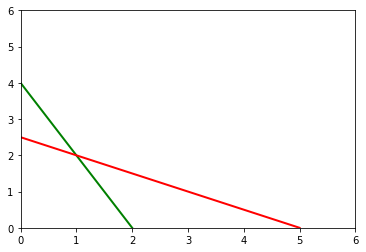

In [6]:
import matplotlib.pyplot as plt

#restrição 1
x11=[2, 0]
x12=[0, 4]

#restrição 2
x21=[5, 0]
x22=[0, 5/2]

plt.plot(x11, x12, 'g-', x21,x22, 'r-',linewidth=2, markersize=1)
plt.axis([0, 6, 0, 6])
plt.show()

Na solução algébrica, o sistema possui $m = 2$ equações e $n = 4$ variáveis. Os pontos extremos podem ser
determinados algebricamente igualando n - m (4 - 2 = 2) variáveis a zero, e resolver as $m=2$ variáveis restantes.

As variáveis iguais a zero são chamadas de **variáveis não básicas** e as restantes de **variáveis básicas**.


|       | Soluções básicas e não básicas|   | ||
|--|--| --| -- | --| --|
|Var. não básicas(zero) |-   | Var. básicas | Solução básica| Viável? | Valor da F.O.,z|
|($x_1$, $x_2$)   |(0,0)   |($s_1$,$s_2$) | (4,5) | Sim | 0|
|($x_1$, $s_1$)   |(0,0)   |($s_2$,$x_2$) | (-3,4) | Não | -|
|($x_1$, $s_2$)   |(0,0)   |($s_1$,$x_2$) | (1.5,2.5) | Sim | 7.5|
|($x_2$, $s_1$)   |(0,0)   |($x_1$,$s_2$) | (2,3) | Sim | 4|
|($x_2$, $s_2$)   |(0,0)   |($x_1$,$s_1$) | (5,-6) | Não | -|
|($s_1$, $s_2$)   |(0,0)   |($x_1$,$x_2$) | (1,2) | Sim | 8|





À medida que o tamanho do problema cresce, o procedimento de enumerar todas as soluções básicas pode ser tornar impraticável. No exemplo acima, temos: 

$C_2^4 = \frac{4!}{2!2!}$

No caso de termos $m=10$ equações  e $n=20$ variáveis é necessário resolver quantos conjuntos?

$C_{10}^{20} = \frac{20!}{10!10!}$

O método Simplex visa amenizar essa tarefa investigando apenas uma fração de todas as possíveis soluções.



**Exercício:**

maximizar $z = 2 x_1 + 3x_2$

sujeito a

$x_1 + 3x_2 \leq 6$

$3x_1 + 2x_2 \leq6$

$x_1, x_2 \geq0$

a) Expresse o problema em equação.

b) Determine todas as soluções básicas e classifique como viáveis e não viáveis.

c) Encontre o valor da função objetivo e determine a solução básica viável ótima.

d) Verifique graficamente que a solução viável ótima, obtida em (c) é a solução ótima do problema PL

 O **método Simplex** 
 
 É uma sequência de cálculos que leva à solução de um problema de programação linear. A técnica implica em uma série de cálculos que são colocados em forma de tabela,  chamada de *tableau*. Cada interação do método corresponde a um ponto extremo e a criação de uma tabela.
 
 A primeira tabela começa pela origem, em que o valor da função objetivo é zero. Se a solução pode ser melhorada, essa primeira tabela é transformada em uma segunda tabela, e assim por diante, até se verificar que a solução ótima foi atingida.

**Exemplo de um problema de maximização utilizando Simplex**

Maximizar $x_1+2x_2$

Sujeito a

$3x_1 + 4x_2 \leq 24$

$5x_1 + 2x_2 \leq 20$

$x_1, x_2 \geq 0$


**1º Passo:** coloque o problema em forma de equações, com variáveis de folga:

Maximizar $x_1+2x_2 + 0s_1 + 0s_2$

Sujeito a

$3x_1 + 4x_2 + s_1 + 0s_2 = 24$

$5x_1 + 2x_2 + s_2 + 0s_1= 20$

$x_1, x_2, s_1, s_2 \geq 0$

**2º Passo:** Primeira tabela - parte 1


|       | |   | ||
|--|--| --| -- | --| --|
| | | 1 | 2| 0| 0| | linha da função objetivo - z |
|($c_j$) |   Var. básicas | $x_1$| $x_2$ | $s_1$| $s_2$ | lado direito ($b_j$)| $\frac{b_j}{a_{ij}}$|
|0 | $s_1$ | 3 | 4| 1 |0 | 24| |
|0 | $s_2$ | 5 | 2| 0 |1 | 20| |

A primeira linha corresponde a contribuição de cada variável para a função objetivo.

A segunda linha lista os elementos básicos da tabela, primeiro temos $c_j$ que mostra a contribuição para a função objetivo das variáveis presentes na solução. Nesse caso, $s_1$ e $s_2$ são as váriáveis básicas, porém elas contribuem zero para a função objetivo. As variáveis não básicas são $x_1$ e $x_2$.

Em seguida, ainda na segunda linha, aparece as demais variáveis ($x_1$, $x_2$, $s_1$ e $s_2$). $b_j$ representa o lado direito das restrições e $\frac{b_j}{a_{ij}}$ indica um cálculo que será apresentado no terceiro passo.

As linhas 3 e 4 são relativas aos coeficientes e o lado direito das restrições.

**2º Passo:** Primeira tabela - parte 2

Acrescenta-se duas linhas à tabela:

--**linha Z**, que corresponde a **redução** da função objetivo se a variável analisada na coluna tiver um acréscimo de uma unidade, e 

--**linha C-Z** que indica o **acréscimo** da função objetivo se a variável analisada tiver um acréscimo de uma unidade.

Para calcular a **linha Z**, nesse caso, multiplica-se coeficientes das variáveis e o lado direito pelos valores de $c_j$ e se soma os produtos na coluna. A coluna $b_j$ na linha Z, representa o valor da função objetivo, que nesse caso é zero, pois, $x_1=x_2=0$.

|       | |   | ||
|--|--| --| -- | --| --|
| | | 1 | 2| 0| 0| | linha da função objetivo - z |
|($c_j$) |   Var. básicas | $x_1$| $x_2$ | $s_1$| $s_2$ | lado direito ($b_j$)| $\frac{b_j}{a_{ij}}$|
|0 | $s_1$ | 3 * 0 | 4 * 0| 1* 0 |0* 0 | 24| |
|0 | $s_2$ | 5 * 0 | 2* 0| 0* 0 |1 * 0| 20| |
| |z | 0+0 | 0 + 0| 0 + 0| 0  + 0|0| | |

Para calcular a **linha C-Z**, subtraimos a linha Z dos coeficientes das variáveis da função objetivo.

|       | |   | ||
|--|--| --| -- | --| --|
| | | **1** | **2**| **0**| **0**| | linha da função objetivo - z |
|($c_j$) |   Var. básicas | $x_1$| $x_2$ | $s_1$| $s_2$ | lado direito ($b_j$)| $\frac{b_j}{a_{ij}}$|
|0 | $s_1$ | 3  | 4| 1 |0 | 24| |
|0 | $s_2$ | 5  | 2| 0 |1 | 20| |
| |z | **0** | **0** | **0**  | **0**   |0| | |
| |c-z | **1-0 = 1** | **2-0=2**| **0-0=0** | **0-0=0**  |0| | |

Como saber se a solução encontrada é a solução ótima? R.: Se, na linha C-Z, os valores são todos nulos ou negativos. Se existem valores positivos, então devemos calcular a próxima tabela.


**3º passo:**  construindo a segunda tabela.

Qual a variável que fornece a maior contribuição à função objetivo? R.: Ao analisar a linha C-Z, pois ela indicaa contribuição de cada variável, é possível perceber que a variável $x_2$ tem a maior contribuição (2 unidades). Diz-se então que $x_2$ é a variável que entra na tabela.
 
Para determinar quem sai da tabela, utilizaremos o cálculo $\frac{b_j}{a_{ij}}$, divide-se cada valor de $b_j$ pelo valor correspondente, na mesma linha, da linha da variável que entra, no caso $x_2$. A linha que aparecer o menor valor indica a variável que sai. Portanto, fica da seguinte maneira:

|       | |   | ||
|--|--| --| -- | --| --|
| | |1 | 2| 0|0| | linha da função objetivo - z |
|($c_j$) |   Var. básicas | $x_1$| $x_2$ | $s_1$| $s_2$ | lado direito ($b_j$)| $\frac{b_j}{a_{ij}}$|
|0 | $s_1$ | 3  | **4**| 1 |0 | **24**|$\frac{24}{4} = 6$ |
|0 | $s_2$ | 5  | **2**| 0 |1 | **20**| $\frac{20}{2} = 10$|
| |z | 0 | 0 | 0  | 0   |0| | |
| |c-z | 1 | **2**| 0 | 0  |0| | |

Quem deverá sair, nesse caso, é a variável $s_1$, que obteve o menor valor (6).

Agora, novos valores deverão ser determinados, tanto para a linha da variável que sai, quanto para as outras variáveis. A linha da variável que sai é a **linha principal**.

O elemento que aparece na coluna da variável que entra $x_2$ com a linha principal (a variável que sai, $s_1$, é chamado **pivô**.

|       | |   | ||
|--|--| --| -- | --| --|
| | |1 | 2| 0|0| | linha da função objetivo - z |
|($c_j$) |   Var. básicas | $x_1$| $x_2$ | $s_1$| $s_2$ | lado direito ($b_j$)| $\frac{b_j}{a_{ij}}$|
|0 | $s_1$ | 3  | **4**| 1 |0 | 24|$\frac{24}{4} = 6$ |
|0 | $s_2$ | 5  | 2| 0 |1 | 20| $\frac{20}{2} = 10$|
| |z | 0 | 0 | 0  | 0   |0| | |
| |c-z | 1 | 2| 0 | 0  |0| | |

Para obter os novos valores da linha principal, devemos dividir o valor antigo pelo pivô. Altera-se também $c_j$ pelo valor do coeficiente de $x_2$ na função objetivo.

|       | |   | ||
|--|--| --| -- | --| --|
| | |1 | 2| 0|0| | linha da função objetivo - z |
|($c_j$) |   Var. básicas | $x_1$| $x_2$ | $s_1$| $s_2$ | lado direito ($b_j$)| $\frac{b_j}{a_{ij}}$|
|2 | **$x_2$** | **3/4**  | **4/4**| **1/4** |**0/4** | $\frac{24}{4} = 6$| |
|0 | $s_2$ | 5  | 2| 0 |1 | 20||
| |z | 0 | 0 | 0  | 0   |0| | |
| |c-z | 1 | 2| 0 | 0  |0| | |

Para determinar a nova linha para $s_2$, encontra-se o elemento que se encontra na linha $s_2$ com a coluna da variável que entrou $x_2$, no caso o valor 2. Multiplica-se cada valor da nova linha principal pelo número valor encontrado (2). Os valores resultantes são subtraídos da antiga linha $s_2$

|       | |   | ||
|--|--| --| -- | --| --|
| | |1 | 2| 0|0| | linha da função objetivo - z |
|($c_j$) |   Var. básicas | $x_1$| $x_2$ | $s_1$| $s_2$ | lado direito ($b_j$)| $\frac{b_j}{a_{ij}}$|
|2 | $x_2$ | 3/4  | 4/4| 1/4 |0/4 | $ 6$| |
|0 | **$s_2$** | **5 - (3/4 * 2)**  | **2 - 1*2**| ** 0 - 1/4*2** |**1 - 0*2** | **20 - 6*2**||
| |z | 0 | 0 | 0  | 0   |0| | |
| |c-z | 1 | 2| 0 | 0  |0| | |

Repete-se o passo da **linha Z**. Relembrando:  multiplica-se os coeficientes das variáveis e o lado direito pelos valores de $c_j$ e se soma os produtos na coluna. A coluna $b_j$ na linha Z, representa o valor da função objetivo, sendo $x_1=s_1=0$.

|       | |   | ||
|--|--| --| -- | --| --|
| | |1 | 2| 0|0| | linha da função objetivo - z |
|($c_j$) |   Var. básicas | $x_1$| $x_2$ | $s_1$| $s_2$ | lado direito ($b_j$)| $\frac{b_j}{a_{ij}}$|
|2 | $x_2$ | 3/4 * 2  = 3/2| 1*2 = 2| 1/4 *2 = 1/2 |0*2 | $ 6*2$| |
|0 | $s_2$ |7/2 *0 | 0 * 0| -1/2*0 |1*0 | 8*0||
| |z | 3/2 + 0 | 2+0 | 1/2+0  | 0+0   |12+0| | |
| |c-z |  | ||   || | |

Para calcular a **linha C-Z**, subtraimos a linha Z dos coeficientes das variáveis da função objetivo.

|       | |   | ||
|--|--| --| -- | --| --|
| | |1 | 2| 0|0| | linha da função objetivo - z |
|($c_j$) |   Var. básicas | $x_1$| $x_2$ | $s_1$| $s_2$ | lado direito ($b_j$)| $\frac{b_j}{a_{ij}}$|
|2 | $x_2$ | 3/4 | 1| 1/4 |02 | $ 6$| |
|0 | $s_2$ |7/2| 0 | -1/2 |1*| 8||
| |z | 3/2  | 2 | 1/2 | 0   |12| | |
| |c-z | 1-3/2  = -1/2|2-2=0 | 0-1/2=-1/2| 0-0=0  || | |

A inspeção da linha C-Z indica que encontramos a solução ótima, pois existem apenas valores nulos e negativos.

|       | |   | ||
|--|--| --| -- | --| --|
| | |1 | 2| 0|0| | linha da função objetivo - z |
|($c_j$) |   Var. básicas | $x_1$| $x_2$ | $s_1$| $s_2$ | lado direito ($b_j$)| $\frac{b_j}{a_{ij}}$|
|2 | $x_2$ | 3/4 | 1| 1/4 |02 | $ 6$| |
|0 | $s_2$ |7/2| 0 | -1/2 |1*| 8||
| |z | 3/2  | 2 | 1/2 | 0   |12| | |
| |c-z |**-1/2**|**0 **| **-1/2**| **0**  || | |

Portanto, temos:

$x_1=0$

$x_2=6$

$z = 12$: função objetivo

Também podemos verificar as restrições:

$3*0+ 4*6 = 24$

ou seja, não há recursos ociosos para $s_1$, e

$5*0 + 2*6 = 12$

que indica que há 8 unidades ociosas correspondente a $s_2$

Segundo a ánalise acima, as restrições foram obedecidas.


**Exercício:**

Resolva o problema abaixo:

maximizar $5x_1 + 4x_2$ 

sujeito a

$6x_1 + 4x_2 \leq 24$

$x_1 + 2x_2 \leq 6$

$-x_1 + x_2 \leq 1$

$x_2 \leq 2$



Bibliografia:
    
    TAHA, Hamdy A. Pesquisa Operacional. 8a edição. Pearson, 2008.
    
    MOREIRA, Daniel A. Pesquisa Operacional. 2a edição revista e atualizada. Cengage Learning, 2010. 